<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color.:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Abuzer Yakaryilmaz and Maksim Dimitrijev<br>
        Özlem Salehi | December 4, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2>Controlled Operations</h2>

We are going to look at controlled operators acting on multiple qubits. 

<h3> CNOT operator </h3>

CNOT is an operator defined on two qubits:

$$
    CNOT = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} .
$$

Its effect is very simple: if the state of the first qubit is one, then the state of the second qubit is flipped. 

If the state of the first bit is zero, then the state of the second qubit remains the same. 

In summary:
<ul>
    <li>$ CNOT \ket{00} = \ket{00} $, </li>
    <li>$ CNOT \ket{01} = \ket{01} $, </li>
    <li>$ CNOT \ket{10} = \ket{11} $, </li>
    <li>$ CNOT \ket{11} = \ket{10} $. </li>
</ul>

CNOT refers to as Controlled-NOT: NOT operator is applied in a controlled way.

<h3> cx-gate </h3>

In Qiskit, CNOT operator is represented as cx-gate.

It takes two arguments: controller-qubit and target-qubit.

Its implementation is as follows:

<i> <b>x-gate</b> (NOT operator) is applied to <u>the target qubit</u> that is <b>CONTROLLED</b> by <u>the controller qubit</u>.</i> 



<h3> Unitary backend</h3>

Unitary_simulator gives a unitary representation of all gates in the circuit until this point.

``` python
    job = execute(circuit, Aer.get_backend('unitary_simulator'))
    current_unitary = job.result().get_unitary(circuit, decimals=3)
    print(current_unitary)
```


Let's check the unitary operator corresponding to the CNOT. We follow the qiskit order.

  1.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  1.0
  0.0  0.0  1.0  0.0


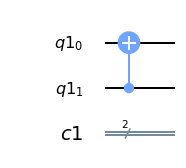

In [2]:
# draw the circuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(2)
creg1 = ClassicalRegister(2)

mycircuit1 = QuantumCircuit(qreg1,creg1)

mycircuit1.cx(qreg1[1],qreg1[0])


job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

mycircuit1.draw(output="mpl")


Now, let's apply CNOT to the states $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $ iteratively where qreg[1] is the control and qreg[0] is the target.

In [3]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    qreg2 =  QuantumRegister(2) # quantum register with 2 qubits
    creg2 = ClassicalRegister(2) # classical register with 2 bits
    mycircuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit2.x(qreg2[1]) # set the state of qreg[1] to |1>
    if input[1]=='1':
        mycircuit2.x(qreg2[0]) # set the state of qreg[0] to |1>

    # apply cx(first-qubit,second-qubit)
    mycircuit2.cx(qreg2[1],qreg2[0])

    # measure both qubits
    mycircuit2.measure(qreg2,creg2)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit2)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

our input is 00 :  00 is observed 100 times
our input is 01 :  01 is observed 100 times
our input is 10 :  11 is observed 100 times
our input is 11 :  10 is observed 100 times


<h3>Task 1</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits. 
<ul>
    <li> Apply Hadamard to both qubits.
    <li> Apply CNOT(qreg[1] is the control,qreg[0] is the target).
    <li> Apply Hadamard to both qubits.
    <li> Measure the circuit.
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit implements CNOT(qreg[0] is the control, qreg[1] is the target).

In [4]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#
# your code is here
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    qreg1 =  QuantumRegister(2) # quantum register with 2 qubits
    creg1 = ClassicalRegister(2) # classical register with 2 bits
    mycircuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit1.x(qreg1[1]) # set the state of the qubit to |1>
    if input[1]=='1':
        mycircuit1.x(qreg1[0]) # set the state of the qubit to |1>

    # apply h-gate to both qubits
    mycircuit1.h(qreg1[0])
    mycircuit1.h(qreg1[1])

    # apply cx
    mycircuit1.cx(qreg1[1],qreg1[0])

    # apply h-gate to both qubits
    mycircuit1.h(qreg1[0])
    mycircuit1.h(qreg1[1])

    # measure both qubits
    mycircuit1.measure(qreg1,creg1)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit1)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")
#


our input is 00 :  00 is observed 100 times
our input is 01 :  11 is observed 100 times
our input is 10 :  10 is observed 100 times
our input is 11 :  01 is observed 100 times


<a href="B39_Controlled_Operations_Solutions.ipynb#task1">click for our solution</a>

<h3>Task 2</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits. 
<ul>
    <li> Apply CNOT(qreg[1] is the control, qreg[0] is the target).
    <li> Apply CNOT(qreg[0] is the control, qreg[1] is the target).
    <li> Apply CNOT(qreg[0] is the control, qreg[1] is the target).
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit swaps the values of the two qubits:
<ul>
    <li> $\ket{00} \rightarrow \ket{00} $ </li>
    <li> $\ket{01} \rightarrow \ket{10} $ </li>
    <li> $\ket{10} \rightarrow \ket{01} $ </li>
    <li> $\ket{11} \rightarrow \ket{11} $ </li>
</ul>

In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#
# your code is here
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    qreg2 =  QuantumRegister(2) # quantum register with 2 qubits
    creg2 = ClassicalRegister(2) # classical register with 2 bits
    mycircuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit2.x(qreg2[1]) # set the value of the qubit to |1>
    if input[1]=='1':
        mycircuit2.x(qreg2[0]) # set the value of the qubit to |1>

    # apply cx(qreg2[0] is the target)
    mycircuit2.cx(qreg2[1],qreg2[0])
    # apply cx(qreg2[1] is the target)
    mycircuit2.cx(qreg2[0],qreg2[1])
    # apply cx(qreg2[1] is the target)
    mycircuit2.cx(qreg2[0],qreg2[1])
    
    mycircuit2.measure(qreg2,creg2)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit2)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")
#


our input is 00 :  00 is observed 100 times
our input is 01 :  01 is observed 100 times
our input is 10 :  11 is observed 100 times
our input is 11 :  10 is observed 100 times


<a href="B39_Controlled_Operations_Solutions.ipynb#task2">click for our solution</a>

<h3> Task 3 [Extra] </h3>

Create a quantum curcuit with $ n=5 $ qubits.

Set each qubit to $ \ket{1} $.

Repeat 4 times:
<ul>
    <li>Randomly pick a pair of qubits, and apply cx-gate (CNOT operator) on the pair.</li>
</ul>

Draw your circuit, and execute your program 100 times.

Verify your measurement results by checking the diagram of the circuit. 

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

#
# your code is here
#


<a href="B39_Controlled_Operations_Solutions.ipynb#task3">click for our solution</a>

<h3> Task 4 </h3>

In this task, our aim is to create an operator which will apply the NOT operator to the target qubit qreg[0] when the control qubit qreg[1] is in state $\ket{0}$. In other words, we want to obtain the following operator:

$\mymatrix{cccc}{0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1}$.

We can summarize its effect as follows:
<ul>
    <li>$  \ket{00} \rightarrow \ket{01} $, </li>
    <li>$  \ket{01} \rightarrow \ket{00} $, </li>
    <li>$  \ket{10} \rightarrow \ket{10} $, </li>
    <li>$  \ket{11} \rightarrow \ket{11} $. </li>
</ul>

Write a function named c0x which takes the circuit name and the register as parameters and implements the operation. Check the corresponding unitary matrix using the code given below.
<ul>
    <li>Apply NOT operator to qreg[1];</li>
    <li>Apply CNOT operator, where qreg[1] is control and qreg[0] is target;</li>
    <li>Apply NOT operator to qreg[1] - to revert it to the initial state.</li>
</ul>

<b>Idea:</b> We can use our regular CNOT operator, and to change the condition for the control qubit we can apply NOT operator to it before the CNOT - this way the NOT operator will be applied to the target qubit when initially the state of the control qubit was $\ket{0}$.

Although this trick is quite simple, this approach is important and will be very useful in our following implementations.

In [ ]:
def c0x(mycircuit,qreg):

#
# Your code here
#

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg4 =  QuantumRegister(2)
creg4 = ClassicalRegister(2)

mycircuit4 = QuantumCircuit(qreg4,creg4)

#We apply the operator c0x by calling the function
c0x(mycircuit4,qreg4)

job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

mycircuit1.draw(output="mpl")

<a href="B39_Controlled_Operations_Solutions.ipynb#task4">click for our solution</a>

<h3>CCNOT</h3>

Now we will discuss CNOT gate controlled by two qubits (also called the Toffoli gate). 

The idea behind this gate is simple - NOT operator is applied to the target qubit when both control qubits are in state $\ket{1}$. Below you can see its matrix representation:

$\mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0}$.


In summary:
<ul>
    <li>$ CCNOT \ket{000} = \ket{000} $, </li>
    <li>$ CCNOT \ket{001} = \ket{001} $, </li>
    <li>$ CCNOT \ket{010} = \ket{010} $, </li>
    <li>$ CCNOT \ket{011} = \ket{011} $. </li>
     <li>$ CCNOT \ket{100} = \ket{100} $, </li>
    <li>$ CCNOT \ket{101} = \ket{101} $, </li>
    <li>$ CCNOT \ket{110} = \ket{111} $,  </li>
    <li>$ CCNOT \ket{111} = \ket{110} $. </li>
</ul>

<h3> ccx-gate </h3>

In Qiskit, CCNOT operator is represented as ccx-gate.

It takes three arguments: two controller-qubits and target-qubit.

    circuit.ccx(control-qubit1,control-qubit2,target-qubit)

<i> <b>x-gate</b> (NOT operator) is applied to <u>the target qubit</u> that is <b>CONTROLLED</b> by <u>the controller qubits</u>.</i> 


Now, let's apply CCNOT iteratively to see its effect. (Note that we follow the qiskit order.)

In [8]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['000','001','010','011','100','101','110','111']

for input in all_inputs:
    qreg3 =  QuantumRegister(3) # quantum register with 3 qubits
    creg3 = ClassicalRegister(3) # classical register with 3 bits
    mycircuit3 = QuantumCircuit(qreg3,creg3) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit3.x(qreg3[2]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit3.x(qreg3[1]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit3.x(qreg3[0]) # set the state of the third qubit to |1>

    # apply ccx(first-qubit,second-qubit,third-qubit)
    mycircuit3.ccx(qreg3[2],qreg3[1],qreg3[0])

    # measure the qubits
    mycircuit3.measure(qreg3,creg3)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit3)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

our input is 000 :  000 is observed 100 times
our input is 001 :  001 is observed 100 times
our input is 010 :  010 is observed 100 times
our input is 011 :  011 is observed 100 times
our input is 100 :  100 is observed 100 times
our input is 101 :  101 is observed 100 times
our input is 110 :  111 is observed 100 times
our input is 111 :  110 is observed 100 times


<hr>
Recall Task 4. Similarly, we can create an operator which applies NOT operator to a target qubit, controlled by two qubits which are in states different than 1. For example, the following implementation allows to apply NOT operator to the target qubit if both control qubits are in state $\ket{0}$. 

The matrix form of the  operator is given as follows:

$\mymatrix{cccc}{0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0& 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0& 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1& 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0& 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0& 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0& 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0& 0 & 0 & 0 & 1}$.


In [12]:
def cc0x(mycircuit,qreg):

    mycircuit.x(qreg[2])
    mycircuit.x(qreg[1])

    mycircuit.ccx(qreg[2],qreg[1],qreg[0])

    # Returning control qubits to the initial state
    mycircuit.x(qreg[1])
    mycircuit.x(qreg[2])

  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


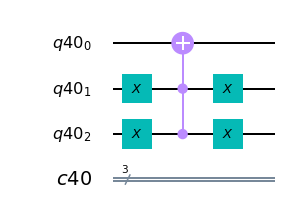

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg4 =  QuantumRegister(3)
creg4 = ClassicalRegister(3)

mycircuit4 = QuantumCircuit(qreg4,creg4)

cc0x(mycircuit4,qreg4)

job = execute(mycircuit4,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit4,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

mycircuit4.draw(output="mpl")

<h3>Task 5</h3>

You have a circuit with three qubits. Apply NOT operator to qreg[1] if qreg[0] is in state 0 and qreg[2] is in state 1. Check its efffect on different inputs.

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['000','001','010','011','100','101','110','111']

for input in all_inputs:
    qreg5 =  QuantumRegister(3) # quantum register with 3 qubits
    creg5 = ClassicalRegister(3) # classical register with 3 bits
    mycircuit5 = QuantumCircuit(qreg5,creg5) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit5.x(qreg5[2]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit5.x(qreg5[1]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit5.x(qreg5[0]) # set the state of the third qubit to |1>

#
# You code here
    mycircuit5.x(qreg5[0])

    mycircuit5.ccx(qreg5[2],qreg5[0],qreg5[1])

    #Set back to initial value
    mycircuit5.x(qreg5[0])
#


# measure the qubits
    mycircuit5.measure(qreg5,creg5)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit5,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit5)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

our input is 000 :  000 is observed 100 times
our input is 001 :  001 is observed 100 times
our input is 010 :  010 is observed 100 times
our input is 011 :  011 is observed 100 times
our input is 100 :  110 is observed 100 times
our input is 101 :  101 is observed 100 times
our input is 110 :  100 is observed 100 times
our input is 111 :  111 is observed 100 times


<a href="B39_Controlled_Operations_Solutions.ipynb#task5">click for our solution</a>

<h3>More controls</h3>

Suppose that you are given ccx operator which applies a not operator controlled by two qubits. You can use additional qubits to implement a not operator controlled by more than two qubits.


The following code implements a NOT operator controlled by the three qubits qreg[1], qreg[2] and qreg[3], qreg[4] is used as the additional qubit and qreg[0] is the target. We apply it iteratively. Note that the first qubit in the output is due to additional qubit.

In [14]:
def cccx(mycircuit,qreg):
    #qreg[4] is set to 1 if qreg[1] and qreg[2] are 1 
    mycircuit.ccx(qreg[1],qreg[2],qreg[4])
    
    #NOT operator is applied to qreg[0] if all three qubits are 1
    mycircuit5.ccx(qreg[3],qreg[4],qreg[0])
    
    #We set back qreg[4] back to its initial value
    mycircuit5.ccx(qreg[1],qreg[2],qreg[4])    

In [15]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['0000','0001','0010','0011','0100','0101','0110','0111','0000','1001','1010','1011','1100',
            '1101','1110','1111']

for input in all_inputs:
    qreg5 =  QuantumRegister(5) # quantum register with 5 qubits
    creg5 = ClassicalRegister(5) # classical register with 5 bits
    mycircuit5 = QuantumCircuit(qreg5,creg5) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit5.x(qreg5[3]) # set the state of the qubit to |1>
    if input[1]=='1':
        mycircuit5.x(qreg5[2]) # set the state of the qubit to |1>
    if input[2]=='1':
        mycircuit5.x(qreg5[1]) # set the state of the qubit to |1>
    if input[3]=='1':
        mycircuit5.x(qreg5[0]) # set the state of the qubit to |1>

    cccx(mycircuit5,qreg5) 
    
    # measure the qubits
    mycircuit5.measure(qreg5,creg5)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit5,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit5)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

our input is 0000 :  00000 is observed 100 times
our input is 0001 :  00001 is observed 100 times
our input is 0010 :  00010 is observed 100 times
our input is 0011 :  00011 is observed 100 times
our input is 0100 :  00100 is observed 100 times
our input is 0101 :  00101 is observed 100 times
our input is 0110 :  00110 is observed 100 times
our input is 0111 :  00111 is observed 100 times
our input is 0000 :  00000 is observed 100 times
our input is 1001 :  01001 is observed 100 times
our input is 1010 :  01010 is observed 100 times
our input is 1011 :  01011 is observed 100 times
our input is 1100 :  01100 is observed 100 times
our input is 1101 :  01101 is observed 100 times
our input is 1110 :  01111 is observed 100 times
our input is 1111 :  01110 is observed 100 times


<h3>Task 6</h3>

Implement the NOT operator controlled by 4 qubits where qreg[0] is the target and apply it iteratively to all possible states. Note that you will need additional qubits.

In [16]:
def ccccx(mycircuit,qreg):
    
    #
    #Your code here
    mycircuit.ccx(qreg[4],qreg[3],qreg[5])
    mycircuit.ccx(qreg[2],qreg[1],qreg[6])

    mycircuit.ccx(qreg[5],qreg[6],qreg[0])

    # Returning additional qubits to the initial state
    mycircuit.ccx(qreg[2],qreg[1],qreg[6])
    mycircuit.ccx(qreg[4],qreg[3],qreg[5])

In [17]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer


all_inputs=['00000','00001','00010','00011','00100','00101','00110','00111','00000',
            '01001','01010','01011','01100','01101','01110','01111','10000','10001',
            '10010','10011','10100','10101','10110','10111','10000','11001','11010',
            '11011','11100','11101','11110','11111']

for input in all_inputs:
    qreg6 =  QuantumRegister(7) # quantum register with 7 qubits
    creg6 = ClassicalRegister(7) # classical register with 7 bits
    mycircuit6 = QuantumCircuit(qreg6,creg6) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit6.x(qreg6[4]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit6.x(qreg6[3]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit6.x(qreg6[2]) # set the state of the third qubit to |1>
    if input[3]=='1':
        mycircuit6.x(qreg6[1]) # set the state of the fourth qubit to |1>
    if input[4]=='1':
        mycircuit6.x(qreg6[0]) # set the state of the fifth qubit to |1>    
    
    ccccx(mycircuit6,qreg6)

    mycircuit6.measure(qreg6,creg6)

    job = execute(mycircuit6,Aer.get_backend('qasm_simulator'),shots=10000)
    counts = job.result().get_counts(mycircuit6)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

our input is 00000 :  0000000 is observed 10000 times
our input is 00001 :  0000001 is observed 10000 times
our input is 00010 :  0000010 is observed 10000 times
our input is 00011 :  0000011 is observed 10000 times
our input is 00100 :  0000100 is observed 10000 times
our input is 00101 :  0000101 is observed 10000 times
our input is 00110 :  0000110 is observed 10000 times
our input is 00111 :  0000111 is observed 10000 times
our input is 00000 :  0000000 is observed 10000 times
our input is 01001 :  0001001 is observed 10000 times
our input is 01010 :  0001010 is observed 10000 times
our input is 01011 :  0001011 is observed 10000 times
our input is 01100 :  0001100 is observed 10000 times
our input is 01101 :  0001101 is observed 10000 times
our input is 01110 :  0001110 is observed 10000 times
our input is 01111 :  0001111 is observed 10000 times
our input is 10000 :  0010000 is observed 10000 times
our input is 10001 :  0010001 is observed 10000 times
our input is 10010 :  001001

<a href="B39_Controlled_Operations_Solutions.ipynb#task6">click for our solution</a>

<h3>Task 7</h3>

Implement the following control: the NOT operator is applied to the target qubit qreg[0] if 5 control qubits qreg[5] to qreg[1] are initially in the state $\ket{10101}$. Check your operator by trying different initial states. You may define a function or write your code directly.

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#Try different initial states
all_inputs=['101010','101011','100000','111111']

for input in all_inputs:
    qreg7 =  QuantumRegister(9) # quantum register with 9 qubits
    creg7 = ClassicalRegister(9) # classical register with 9 bits
    mycircuit7 = QuantumCircuit(qreg7,creg7) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit7.x(qreg7[5]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit7.x(qreg7[4]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit7.x(qreg7[3]) # set the state of the third qubit to |1>
    if input[3]=='1':
        mycircuit7.x(qreg7[2]) # set the state of the fourth qubit to |1>
    if input[4]=='1':
        mycircuit7.x(qreg7[1]) # set the state of the fifth qubit to |1>
    if input[5]=='1':
        mycircuit7.x(qreg7[0]) # set the state of the fifth qubit to |1>

    #
    # Your code here
    #
    
    mycircuit7.measure(qreg7,creg7)

    job = execute(mycircuit7,Aer.get_backend('qasm_simulator'),shots=10000)
    counts = job.result().get_counts(mycircuit7)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

<a href="B39_Controlled_Operations_Solutions.ipynb#task7">click for our solution</a>

<h3>Task 8 (Optional)</h3>

Implement the parametrized controlled NOT operator with 4 control qubits, where parameter will be the state of control qubits for which NOT operator will be applied to the target qubit.

As a result you need to define the following function: <i>control(circuit,quantum_reg,number)</i>, where:
<ul>
    <li><i>circuit</i> allows to pass the quantum circuit;</li>
    <li><i>quantum_reg</i> allows to pass the quantum register;</li>
    <li><i>state</i> is the state of control qubits, between 0 and 15, where 0 corresponds to 0000 and 15 corresponds to 1111 (like binary numbers :) ).</li>
</ul>

In [ ]:
#state - the state of control qubits, between 0 and 15.
def control(circuit,quantum_reg,state):

#
# your code is here
#

You can try different inputs to see that your function is implementing the mentioned control operation.

In [ ]:
#Try different initial states
all_inputs=['01010','01011','10000','11111']

for input in all_inputs:
    qreg8 =  QuantumRegister(7) # quantum register with 7 qubits
    creg8 = ClassicalRegister(7) # classical register with 7 bits
    mycircuit8 = QuantumCircuit(qreg8,creg8) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit8.x(qreg8[4]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit8.x(qreg8[3]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit8.x(qreg8[2]) # set the state of the third qubit to |1>
    if input[3]=='1':
        mycircuit8.x(qreg8[1]) # set the state of the fourth qubit to |1>
    if input[4]=='1':
        mycircuit8.x(qreg8[0]) # set the state of the fifth qubit to |1>


    control(mycircuit8,qreg8,5)
    mycircuit8.measure(qreg8,creg8)

    job = execute(mycircuit8,Aer.get_backend('qasm_simulator'),shots=10000)
    counts = job.result().get_counts(mycircuit8)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

<a href="B39_Controlled_Operations_Solutions.ipynb#task8">click for our solution</a>

<h3> Multi-controlled Not Gate </h3>

In Qiskit there is a multi-controlled not gate, known as the multi controlled Toffoli gate. It is represented by mct.

    circuit.mct(control_list,target_qubit,ancilla_list)

<i> <b>x-gate</b> (NOT operator) is applied to <u>the target qubit</u> <b>CONTROLLED</b> by <u>the list of control qubits</u> using the <u>ancilla list</u> as the additional qubits</u>.</i> 


If there are $n$ control qubits, how many additional qubits do you need?

Let's apply a NOT operator controlled by the four qubits qreg[1], qreg[2], qreg[3] and qreg[4]. Let qreg[5] and qreg[6] be the additional qubits and let qreg[0] be the target. Let's check the inputs 11111 and 11110.

In [18]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['11110','11111']

for input in all_inputs:
    qreg =  QuantumRegister(7) # quantum register with 7 qubits
    creg = ClassicalRegister(7) # classical register with 7 bits
    mycircuit = QuantumCircuit(qreg,creg) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit.x(qreg[4]) # set the state of the qubit to |1>
    if input[1]=='1':
        mycircuit.x(qreg[3]) # set the state of the qubit to |1>
    if input[2]=='1':
        mycircuit.x(qreg[2]) # set the state of the qubit to |1>
    if input[3]=='1':
        mycircuit.x(qreg[1]) # set the state of the qubit to |1>
    if input[4]=='1':
        mycircuit.x(qreg[0]) # set the state of the qubit to |1>

    control_list=[]
    for i in range(1,5):
        control_list.append(qreg[i])
    mycircuit.mct(control_list,qreg[0],[qreg[5],qreg[6]]) 
    
    # measure the qubits
    mycircuit.measure(qreg,creg)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")

our input is 11110 :  0011111 is observed 100 times
our input is 11111 :  0011110 is observed 100 times
